In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_bkg = [
    "TTJets",
]

In [4]:
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", location_cfg="backgrounds.yaml")

events_bkg = {}

for i in tqdm(samples_bkg):
    fname = fileset_bkg[i][0]
    print(fname)
    events_bkg[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events()

  0%|          | 0/1 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/Backgrounds/2018_v2/TTJets_TuneCP5/LLPnanoAODv2/TTJets_TuneCP5_part1_part-0.root


In [5]:
fileset_skim = utilities.make_fileset(samples_bkg, "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml")

events_skim = {}

for i in tqdm(samples_bkg):
    fname = fileset_skim[i][0]
    print(fname)
    events_skim[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events()

  0%|          | 0/1 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/Backgrounds/2018_v2/Skims/TTJets_TuneCP5/skimmed_output1_0.root


In [ ]:
bkg, skim = events_bkg['TTJets'], events_skim['TTJets']

In [8]:
bkg.fields

['LHEPart',
 'OtherPV',
 'LowPtElectron',
 'PV',
 'Flag',
 'Photon',
 'BS',
 'IsoTrack',
 'boostedTau',
 'DSAMuonVertex',
 'GenDressedLepton',
 'PuppiMET',
 'GenJet',
 'PatDSAMuonVertexRefittedTracks',
 'genTtbarId',
 'DeepMETResolutionTune',
 'SubJet',
 'L1Reco',
 'HTXS',
 'TrigObj',
 'PatMuonVertex',
 'LHEScaleWeight',
 'run',
 'FsrPhoton',
 'CaloMET',
 'GenJetAK8',
 'L1PreFiringWeight',
 'MET',
 'fixedGridRhoFastjetAll',
 'SoftActivityJetHT10',
 'TkMET',
 'GenMET',
 'Generator',
 'fixedGridRhoFastjetCentral',
 'HLT',
 'SoftActivityJet',
 'GenPart',
 'event',
 'HLTriggerFirstPath',
 'SoftActivityJetHT5',
 'RawMET',
 'Electron',
 'L1',
 'Muon',
 'Jet',
 'PatDSAMuonVertex',
 'fixedGridRhoFastjetCentralCalo',
 'RawPuppiMET',
 'luminosityBlock',
 'LHE',
 'L1simulation',
 'LHEPdfWeight',
 'GenVtx',
 'SoftActivityJetNjets5',
 'SoftActivityJetHT2',
 'DeepMETResponseTune',
 'genWeight',
 'SV',
 'LHEReweightingWeight',
 'btagWeight',
 'GenIsolatedPhoton',
 'SubGenJetAK8',
 'GenVisTau',
 'Corr

In [7]:
import mplhep as hep

In [11]:
def value_extract(sample):
    sample_pfmu = sample.Muon
    sample_ele = sample.Electron
    sample_pho = sample.Photon
    sample_dsa = sample.DSAMuon
    
    return sample_pfmu, sample_ele, sample_pho, sample_dsa

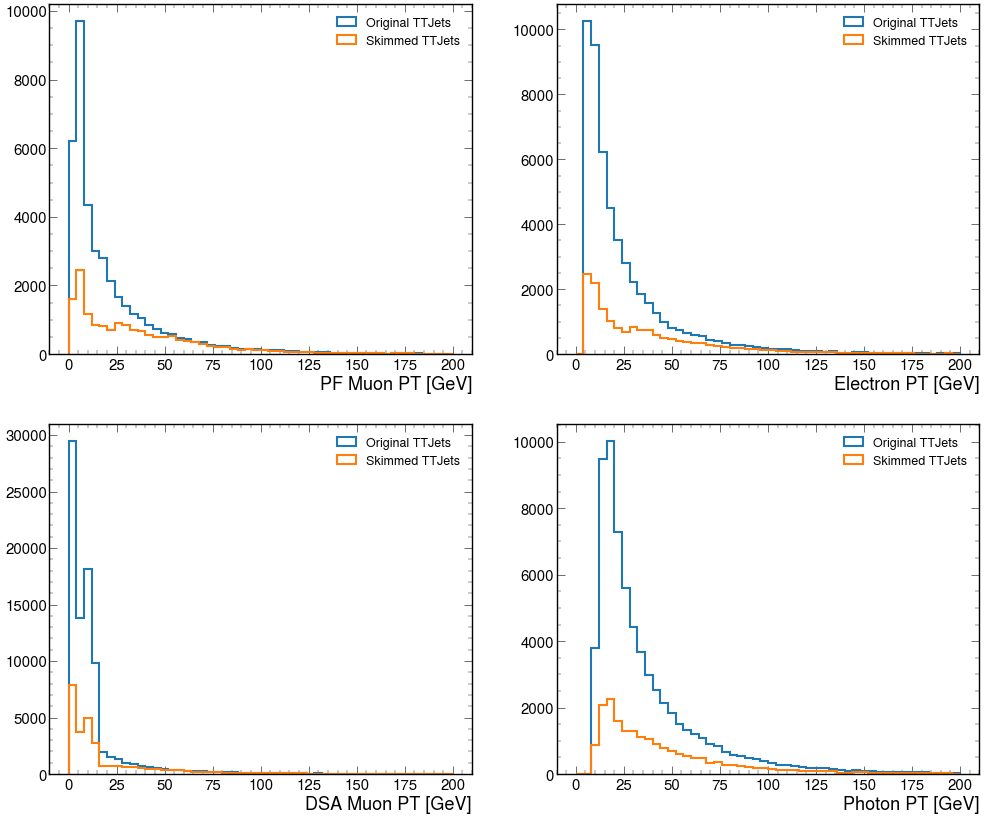

In [42]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))
    
ax[0,0].hist(ak.flatten(value_extract(bkg)[0].pt), range=(0,200), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[0,0].hist(ak.flatten(value_extract(skim)[0].pt), range=(0,200), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')
ax[0,1].hist(ak.flatten(value_extract(bkg)[1].pt), range=(0,200), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[0,1].hist(ak.flatten(value_extract(skim)[1].pt), range=(0,200), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')
ax[1,0].hist(ak.flatten(value_extract(bkg)[3].pt), range=(0,200), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[1,0].hist(ak.flatten(value_extract(skim)[3].pt), range=(0,200), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')
ax[1,1].hist(ak.flatten(value_extract(bkg)[2].pt), range=(0,200), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[1,1].hist(ak.flatten(value_extract(skim)[2].pt), range=(0,200), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')

ax[0,0].set_xlabel('PF Muon PT [GeV]')
ax[0,1].set_xlabel('Electron PT [GeV]')
ax[1,0].set_xlabel('DSA Muon PT [GeV]')
ax[1,1].set_xlabel('Photon PT [GeV]')

ax[0,0].legend(fontsize=18)
ax[0,1].legend(fontsize=18)
ax[1,0].legend(fontsize=18)
ax[1,1].legend(fontsize=18)

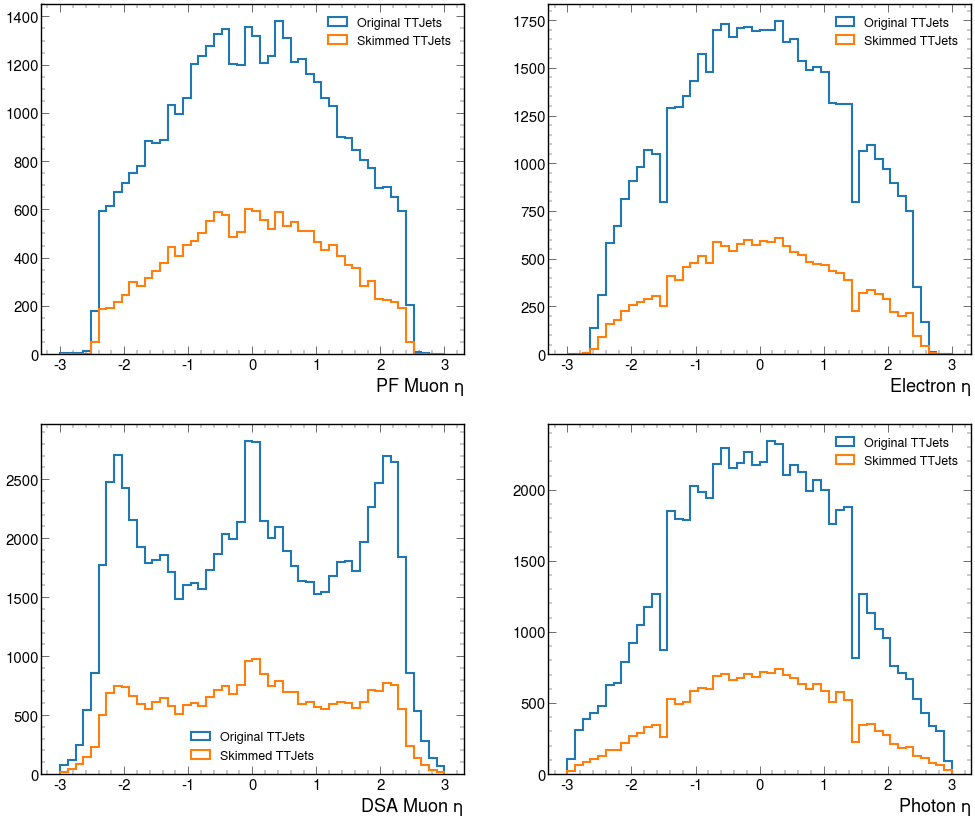

In [40]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))
    
ax[0,0].hist(ak.flatten(value_extract(bkg)[0].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[0,0].hist(ak.flatten(value_extract(skim)[0].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')
ax[0,1].hist(ak.flatten(value_extract(bkg)[1].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[0,1].hist(ak.flatten(value_extract(skim)[1].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')
ax[1,0].hist(ak.flatten(value_extract(bkg)[3].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[1,0].hist(ak.flatten(value_extract(skim)[3].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')
ax[1,1].hist(ak.flatten(value_extract(bkg)[2].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[1,1].hist(ak.flatten(value_extract(skim)[2].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')

ax[0,0].set_xlabel('PF Muon $\eta$')
ax[0,1].set_xlabel('Electron $\eta$')
ax[1,0].set_xlabel('DSA Muon $\eta$')
ax[1,1].set_xlabel('Photon $\eta$')

ax[0,0].legend(fontsize=18)
ax[0,1].legend(fontsize=18)
ax[1,0].legend(fontsize=18)
ax[1,1].legend(fontsize=18)

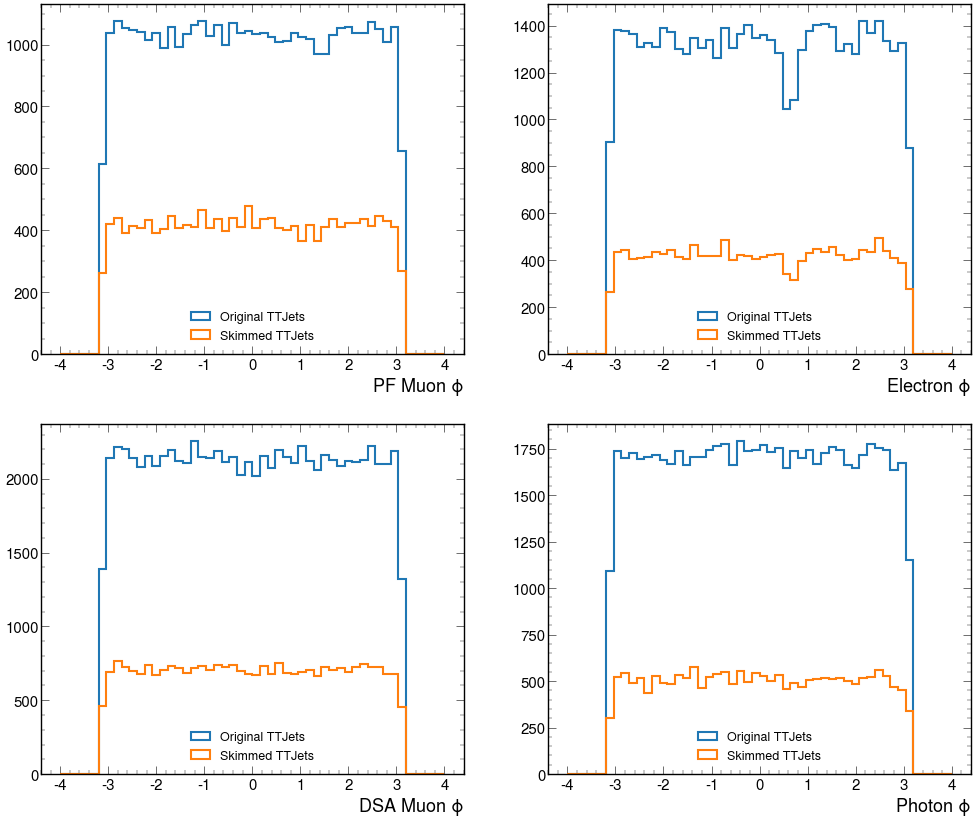

In [43]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))
    
ax[0,0].hist(ak.flatten(value_extract(bkg)[0].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[0,0].hist(ak.flatten(value_extract(skim)[0].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')
ax[0,1].hist(ak.flatten(value_extract(bkg)[1].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[0,1].hist(ak.flatten(value_extract(skim)[1].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')
ax[1,0].hist(ak.flatten(value_extract(bkg)[3].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[1,0].hist(ak.flatten(value_extract(skim)[3].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')
ax[1,1].hist(ak.flatten(value_extract(bkg)[2].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[1,1].hist(ak.flatten(value_extract(skim)[2].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')

ax[0,0].set_xlabel('PF Muon $\phi$')
ax[0,1].set_xlabel('Electron $\phi$')
ax[1,0].set_xlabel('DSA Muon $\phi$')
ax[1,1].set_xlabel('Photon $\phi$')

ax[0,0].legend(fontsize=18)
ax[0,1].legend(fontsize=18)
ax[1,0].legend(fontsize=18)
ax[1,1].legend(fontsize=18)

In [22]:
def jet(sample):
    sample_jet = sample.Jet
    
    return sample_jet

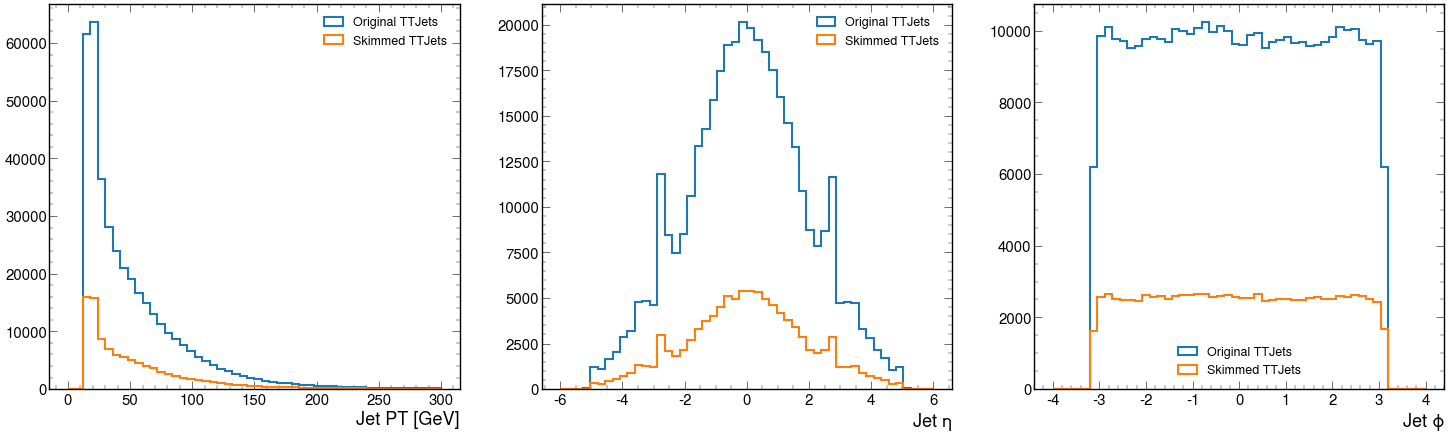

In [44]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 3, figsize=(36,10))
    
ax[0].hist(ak.flatten(jet(bkg).pt), range=(0,300), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[0].hist(ak.flatten(jet(skim).pt), range=(0,300), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')

ax[1].hist(ak.flatten(jet(bkg).eta), range=(-6,6), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[1].hist(ak.flatten(jet(skim).eta), range=(-6,6), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')

ax[2].hist(ak.flatten(jet(bkg).phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Original TTJets')
ax[2].hist(ak.flatten(jet(skim).phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, density=False, label='Skimmed TTJets')

ax[0].set_xlabel('Jet PT [GeV]')
ax[1].set_xlabel('Jet $\eta$')
ax[2].set_xlabel('Jet $\phi$')

ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[2].legend(fontsize=18)